In [29]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

In [30]:
df_train=pd.read_csv('data_teslanetwork/train.csv',index_col=0)

In [31]:
df_train.head(5)

,location,fault_severity
id,,
14121,location 118,1
9320,location 91,0
14394,location 152,1
8218,location 931,1
14804,location 120,0


In [32]:
df_train['fault_severity'].value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [33]:
#checking failures by location
eventLocations = df_train.groupby('fault_severity')
dfrd=eventLocations.describe()
dfrd.head(20)

location
fault_severity                      
0              count            4784
               unique            808
               top      location 126
               freq               69
1              count            1871
               unique            551
               top      location 821
               freq               27
2              count             726
               unique            163
               top     location 1100
               freq               33

In [34]:
pd.crosstab(df_train.fault_severity,df_train.location)

location,location 1,location 10,location 100,location 1000,location 1002,location 1005,location 1006,location 1007,location 1008,location 1009,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,14,1,13,3,1,1,3,16,34,4,...,1,3,2,3,0,5,4,1,4,3
1,8,0,2,0,0,0,0,3,21,0,...,0,11,0,3,1,0,14,3,6,3
2,2,0,0,0,0,0,0,0,16,0,...,0,2,0,0,2,0,22,0,1,0


In [35]:
eventType = pd.read_csv('data_teslanetwork/event_type.csv', index_col=0)
eventTypeVectorized = pd.get_dummies(eventType).groupby(eventType.index).sum()
severityType = pd.read_csv('data_teslanetwork/severity_type.csv', index_col=0)
severityTypeVectorized = pd.get_dummies(severityType).groupby(severityType.index).sum()
logFeature = pd.read_csv('data_teslanetwork/log_feature.csv', index_col=0)
logFeatureVectorized = pd.get_dummies(logFeature).groupby(logFeature.index).sum()
resourceType = pd.read_csv('data_teslanetwork/resource_type.csv', index_col=0)
resourceTypeVectorized = pd.get_dummies(resourceType).groupby(resourceType.index).sum()
mergedTables = df_train.join(eventTypeVectorized).join(severityTypeVectorized).join(logFeatureVectorized).join(resourceTypeVectorized)
mergedTables.head()

,location,fault_severity,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,resource_type_resource_type 1,resource_type_resource_type 10,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9
id,,,,,,,,,,,,,,,,,,,,,
14121,location 118,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9320,location 91,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14394,location 152,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8218,location 931,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14804,location 120,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
mergedTables['volume'].describe()

count    7381.000000
mean       31.820214
std        78.927572
min         1.000000
25%         3.000000
50%         8.000000
75%        25.000000
max      1649.000000
Name: volume, dtype: float64

In [37]:
pd.crosstab(mergedTables.fault_severity, mergedTables.volume)

volume,1,2,3,4,5,6,7,8,9,10,...,772,805,857,930,961,976,1041,1155,1222,1649
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,429,592,295,385,189,272,143,161,117,117,...,1,1,1,1,1,1,1,0,1,1
1,116,307,158,237,116,133,55,85,54,56,...,0,0,0,0,0,0,0,0,0,0
2,19,13,6,8,5,2,2,22,6,11,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#Normalizing volume data (df_norm = (df - df.mean()) / (df.max() - df.min()))
volume_norm = (mergedTables.volume - mergedTables.volume.mean())/(mergedTables.volume.max() - mergedTables.volume.min())
volume_norm.head()

id
14121    0.003750
9320     0.172439
14394   -0.018095
8218    -0.005959
14804   -0.012027
Name: volume, dtype: float64

In [39]:
df_X = mergedTables
df_X = df_X.drop('location', 1)
df_X = df_X.drop('fault_severity', 1)
df_X['volume'] = volume_norm
df_X.head(5)

,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,event_type_event_type 19,...,resource_type_resource_type 1,resource_type_resource_type 10,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9
id,,,,,,,,,,,,,,,,,,,,,
14121,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9320,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14394,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8218,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14804,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
X = df_X.as_matrix()
y = mergedTables.as_matrix(['fault_severity'])
#Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

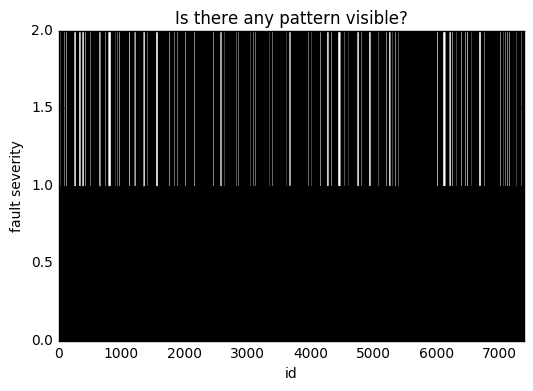

In [41]:
#check if there is any overall temporal pattern visible (assuming that the ids are arranged over time)
faultSeverity = mergedTables.fault_severity
n_count_data = len(faultSeverity)
plt.bar(np.arange(n_count_data), faultSeverity, color="#348ABD")
plt.xlabel("id")
plt.ylabel("fault severity")
plt.title("Is there any pattern visible?")
plt.xlim(0, n_count_data)
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [44]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

nb_classes = 3
batch_size = 128
nb_epoch = 20

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

dims = X.shape[1]
print(dims, 'dims')

model = Sequential()
model.add(Dense(512, input_shape=(dims,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms,metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size, nb_epoch=nb_epoch,
           verbose=2,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

7011 train samples
370 test samples
455 dims


c:\users\dell\appdata\local\programs\python\python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 7011 samples, validate on 370 samples
Epoch 1/20
2s - loss: 0.8693 - acc: 0.6500 - val_loss: 0.9041 - val_acc: 0.6135
Epoch 2/20
1s - loss: 0.8573 - acc: 0.6500 - val_loss: 0.9358 - val_acc: 0.6135
Epoch 3/20
1s - loss: 0.8581 - acc: 0.6500 - val_loss: 0.9036 - val_acc: 0.6135
Epoch 4/20
1s - loss: 0.8577 - acc: 0.6500 - val_loss: 0.9159 - val_acc: 0.6135
Epoch 5/20
1s - loss: 0.8573 - acc: 0.6500 - val_loss: 0.9072 - val_acc: 0.6135
Epoch 6/20
1s - loss: 0.8577 - acc: 0.6500 - val_loss: 0.9120 - val_acc: 0.6135
Epoch 7/20
1s - loss: 0.8570 - acc: 0.6500 - val_loss: 0.9104 - val_acc: 0.6135
Epoch 8/20
2s - loss: 0.8566 - acc: 0.6500 - val_loss: 0.9095 - val_acc: 0.6135
Epoch 9/20
2s - loss: 0.8573 - acc: 0.6500 - val_loss: 0.9201 - val_acc: 0.6135
Epoch 10/20
2s - loss: 0.8568 - acc: 0.6500 - val_loss: 0.9049 - val_acc: 0.6135
Epoch 11/20
2s - loss: 0.8575 - acc: 0.6500 - val_loss: 0.9124 - val_acc: 0.6135
Epoch 12/20
2s - loss: 0.8560 - acc: 0.6500 - val_loss: 0.9055 - val_ac